# Aclaraciones: 

Este notebook está fuera de los temas que veremos en el curso, aunque está muy relaciondo con los algoritmos que veremos, tanto para resolver ecuaciones diferenciales, como para encontrar ceros de una ecuación trasendental. Además, sería una vergüenza si terminaran la carrera sin conocer algo sobre este mapeo. 

Por otra parte, estudiar mapeos es algo de sumo interés en la física computacional y por lo tanto, podría ser un tema interesante a estudiarse como proyecto final. Si lo que descubras aquí te genera muchas nuevas preguntas y curiosidad, investiga (lee sobre caos, fractales, mapeos, etc.) y propon un proyecto al respecto. 

Si te interesa, puedo enviarte bibliografía por correo. Sólo tienes que pedirlo. 

# Mapeo Logístico como función


La ecuación Logística es una de las más estudiadas en el mundo de la física y también de las matemáticas de los sistemas dinámicos. 

En su versión de no diferencial puede servir de modelo de una población de insectos con comida finita. Pensemos que en una región hay una cantidad de insectos. Estos se reproducen dependiendo el número de insectos que hay inicialmente. Cada año, papá y mamá se juntan y producen una cantidad de insectos o sea $x_n = K x_{n-1}$. Aquí $K$ es una constante que depende de la diferencia entre fertilidad y mortalidad de los insectos. Ahora bien, si la comida es limitada, el valor de $K$ dependerá de qué tantos insectos haya (entre cuantos se reparte el pastel). Si pensamos en porcentajes (en realidad valores normalizados), la población puede llegar a un máximo, pues si se excede, habrá más muertos de hambre que reproducidos. $K (1-x_{n}$ es entonces una buena aproximación de la diferencia entre los reproducidos y los que mueren de hambre. Por lo tanto,  $ x_n = K x_{n-1} (1-x_{n-1})$ es un buen modelo de cuantos insectos habrá año con año ($n$), dependiendo de los insectos que había en la misma región el año anterior.

Para revisar este mapeo, lo primero que tenemos que identificar es que: 

- K es un parámetro. 
- n es una variable de tiempo

Por lo tanto, tenemos que estudiar qué sucede si cambiamos el valor inicial $x_0$, si cambiamos $n$ y si cambiamos $K$. 

Comencemos por ver como se ve la función del mapeo de un año al siguiente: 

In [75]:
poblacion(x0,K) = K.*x0.*(1 .-x0)

poblacion (generic function with 2 methods)

Si graficamos este mapeo, veremos que es simplemente una parábola

In [76]:
using PyPlot

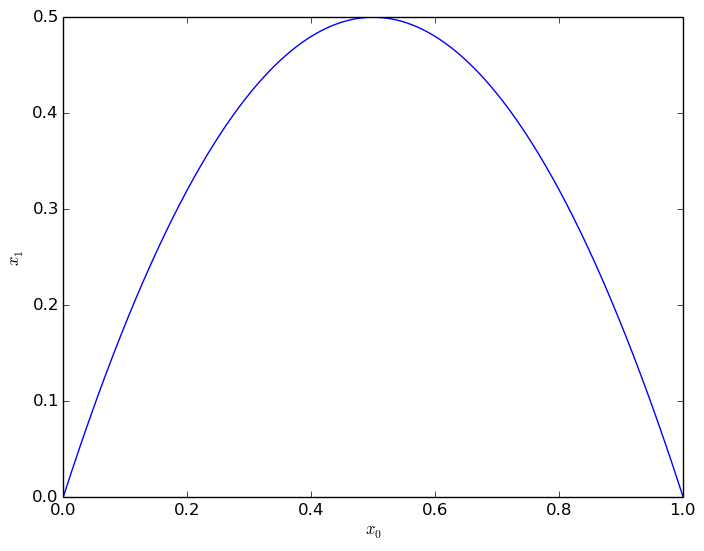

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff2b5348390>

In [77]:
x0 = 0:0.001:1
xlabel(L"x_0")
ylabel(L"x_1")
plot(x0,poblacion(x0,2))

Ok, es aburrido hasta ahora. Ahora veamos ¿Cuanto vale $x_n$? para $n$ suficientemente grande!! 

In [78]:
function poblacion(x0,K,n)
    for i in 1:n
        x0 = poblacion(x0,K)
    end
    return x0
end

poblacion (generic function with 2 methods)

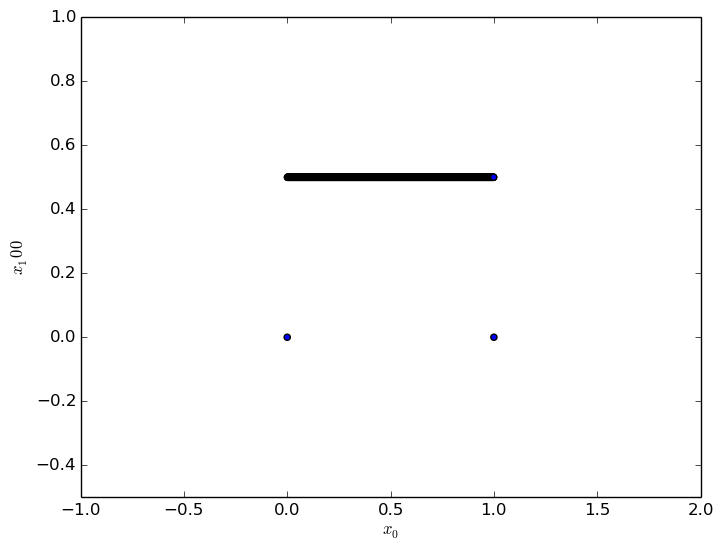

PyObject <matplotlib.collections.PathCollection object at 0x7ff2b4d81e10>

In [79]:
x0 = 0:0.001:1
xlabel(L"x_0")
ylabel(L"x_100")
axis([-1,2,-.5,1])
scatter(x0,poblacion(x0,2,100))  # el primer intento es K=2

Vemos que no importa con qué valor iniciemos, $x_{100}$ es siempre el mismo, excepto si $x_0 = 0$ ó $x_0 = 1$

¿Qué pasa para otros valores de K?

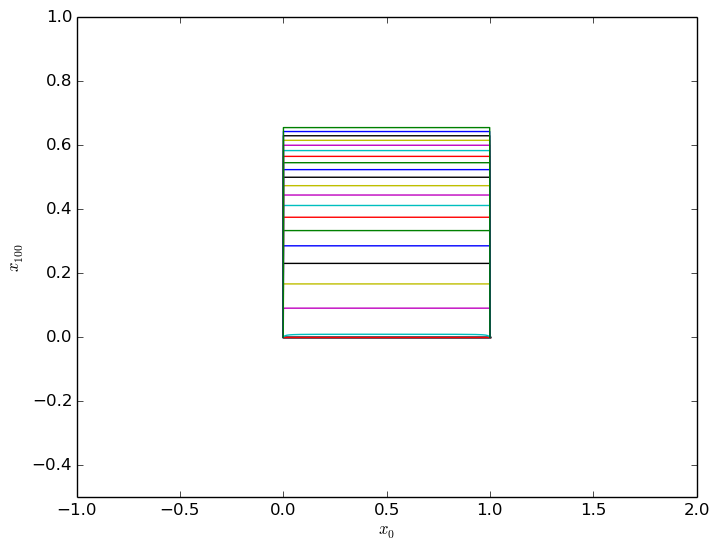

In [80]:
for k in 0:0.1:2.9   #variación de K
    x0 = 0:0.001:1
    xlabel(L"x_0")
    ylabel(L"x_{100}")
    axis([-1,2,-.5,1])
    plot(x0,poblacion(x0,k,100))
end

Pareciera que siempre pasa lo mismo...

pero entonces algo extraño sucede

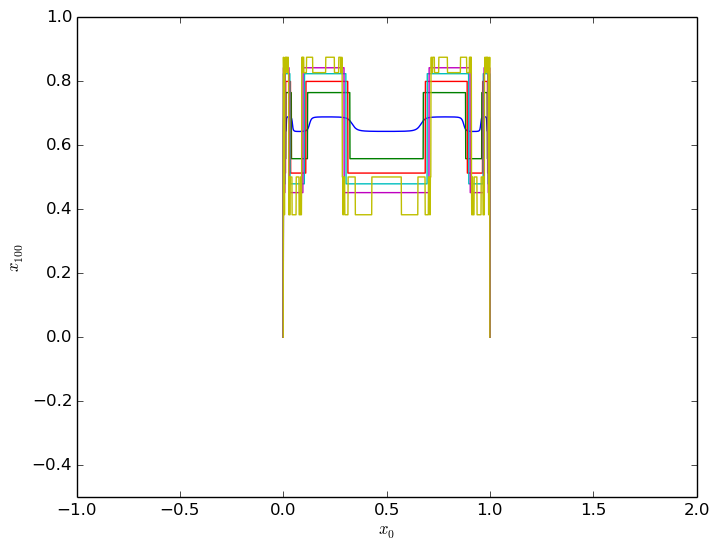

In [81]:
for k in 3:0.1:3.5 #variación de K
    x0 = 0:0.001:1
    xlabel(L"x_0")
    ylabel(L"x_{100}")
    axis([-1,2,-.5,1])
    plot(x0,poblacion(x0,k,100))
end

y cada vez más extraño

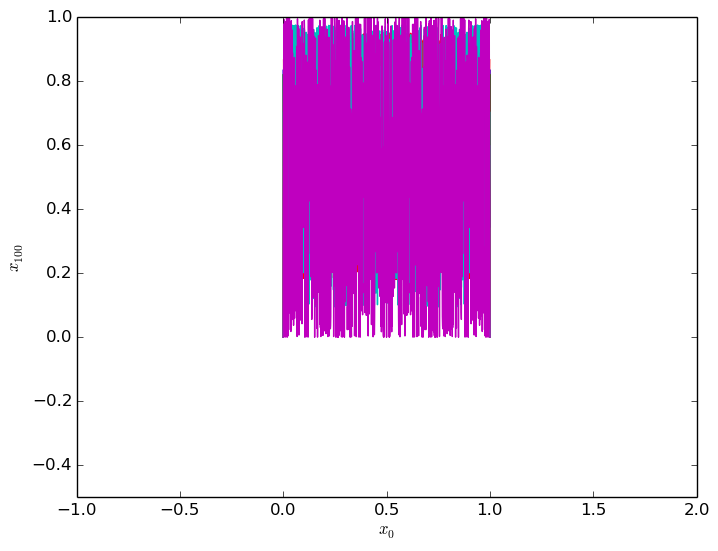

In [37]:
for k in 3.6:0.1:4  #variación de K
    x0 = 0:0.001:1
    xlabel(L"x_0")
    ylabel(L"x_{100}")
    axis([-1,2,-.5,1])
    plot(x0,poblacion(x0,k,100))
end

Sí!!, algo extraño pasa para algunos valores. Qué pasa si ahora graficamos $x_n$ contra $n$ 

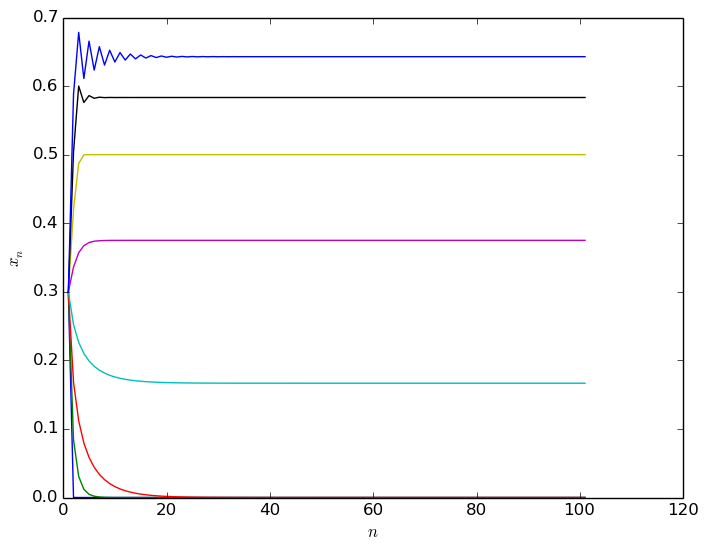

In [82]:
x = 0.3
for k in 0:0.4:2.8
    xn = [x]
    n = 
    for i in 1:100
        push!(xn,poblacion(x,k, i))
    end

    xlabel(L"n")
    ylabel(L"x_{n}")
    plot(1:101,xn)
end

Al inicio Nada!! vemos lo que esperábamos, el mapeo converge a un solo valor. 

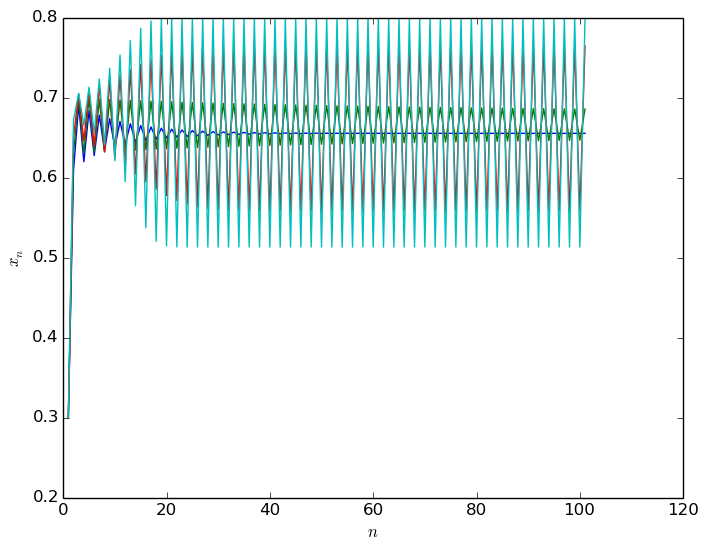

In [45]:
x = 0.3
for k in 2.9:0.1:3.2
    xn = [x]
    n = 
    for i in 1:100
        push!(xn,poblacion(x,k, i))
    end

    xlabel(L"n")
    ylabel(L"x_{n}")
    plot(1:101,xn)
end

Entonces empieza a converger a 2 valores. 

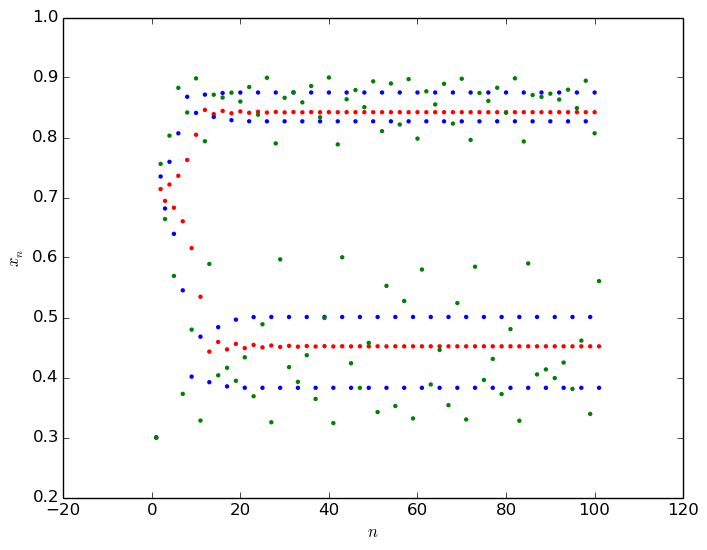

In [59]:
x = 0.3
j = 0
for k in 3.4:0.1:3.6
    j +=1
    xn = [x]
    cc = ["red", "blue", "green"]
    for i in 1:100
        push!(xn,poblacion(x,k, i))
    end

    xlabel(L"n")
    ylabel(L"x_{n}")
    scatter(1:101,xn, lw=0, s=10, c=cc[j])
end

pero mientras $K$ crece, $x_n$ converge a más y más valores.  

¿Cómo se ven los valores a los que converge $x_n$ como función de K?

Para graficar esto, tengo que elegir qué valores de $n$ tomaré. En este ejemplo graficaré $x_{100}, x_{101}, ..., x_{120}$ y después, en el último zoom incrementaré la $n$ hasta 250. 

(Puesto que son muchísimos puntos los que graficaré, tardará un poco en salir el gráfico, sé paciente si lo estás corriendo en tu propia compu)

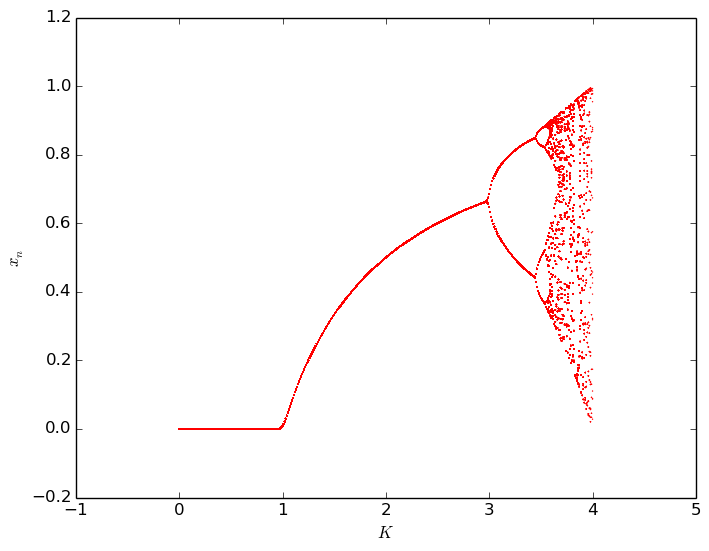

elapsed time: 5.603313333 seconds


5.603313333

In [83]:
tic()
x = 0.3
X = Float64[]
K = Float64[]
for k in 0:0.01:4
    for i in 100:120
        push!(K, k)
        push!(X, poblacion(x,k,i))
    end

    xlabel(L"K")
    ylabel(L"x_{n}")
    scatter(K, X, lw=0, s=1, c="red")
end
toc()

Ahora un zoom a la parte más interesante. Recuerda que como cambiamos las escalas de los ejes, se deformará un poco la figura, estirándose en la dirección del eje x.  

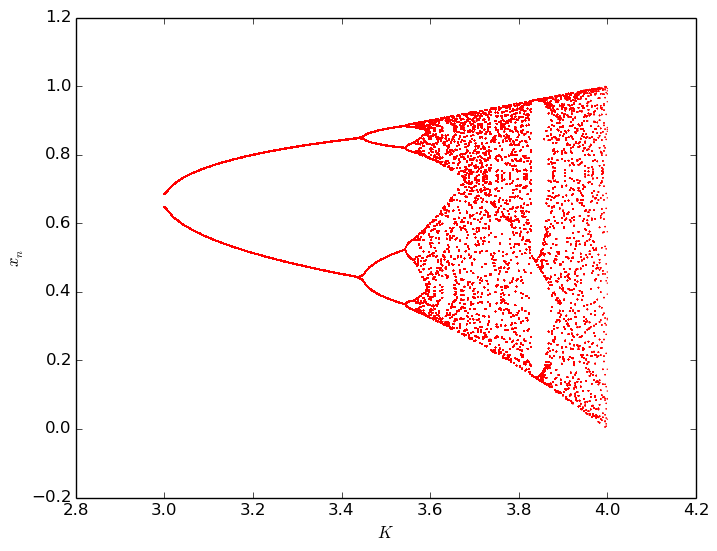

elapsed time: 6.824622874 seconds


6.824622874

In [84]:
tic()
x = 0.3
X = Float64[]
K = Float64[]
for k in 3:0.0025:4
    for i in 100:120
        push!(K, k)
        push!(X, poblacion(x,k,i))
    end

    xlabel(L"K")
    ylabel(L"x_{n}")
    scatter(K, X, lw=0, s=1, c="red")
end
toc()

y otro zoom!! a esa ventanita en $K \in [3.8,3.9]$

sé paciente!! 

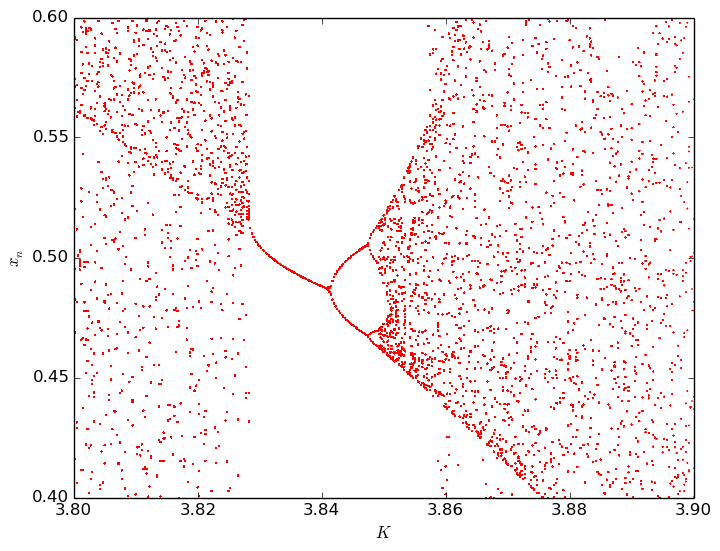

elapsed time: 11.867452277 seconds


11.867452277

In [85]:
tic()
x = 0.3
X = Float64[]
K = Float64[]
axis([3.8,3.9,.4,.6])
for k in 3.8:0.00025:3.9
    for i in 200:250
        push!(K, k)
        push!(X, poblacion(x,k,i))
    end

    xlabel(L"K")
    ylabel(L"x_{n}")
    scatter(K, X, lw=0, s=1, c="red")
end
toc()

Notas algo interesante? 

Espero que te hayas divertido viendo este notebook y que ahora tengas muchas preguntas y mucha curiosidad por saber más sobre el mapeo logístico!!! 